In [1]:
import polars as pl
import pandas as pd

In [2]:
df = pl.read_csv("/Users/ashrita/Desktop/env/bq-results-20231226-093536-1703583373486.csv", infer_schema_length = 10000)

In [3]:
df = df.with_columns(
   date = pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
)

In [19]:
# #voila:hide-code
# import polars as pl

# filtered_df = df.filter(
#     (df['event_type'].is_in(['omni.utterance.detected', 'omni.text.detected', 'omni.hint.selected'])) &
#     df['timestamp'].is_not_null()
# )

# filtered_df = filtered_df.with_columns(
#     date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
# )

# result1_df = (
#     filtered_df
#     .group_by(['date', 'event_type'])
#     .agg(event_count= pl.col('timestamp').count())
#     .sort(['date', 'event_type'])
# )

# #voila:hide-code

In [30]:
#voila:hide-code
filtered_df = df.filter(
    (df['event_type'].is_in(['omni.utterance.detected', 'omni.text.detected', 'omni.hint.selected'])) &
    df['timestamp'].is_not_null()
)

filtered_df = filtered_df.with_columns(
    date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
)


result2_df = (
    filtered_df
    .group_by(['date', 'event_type'])
    .agg(
        event_count=pl.col('timestamp').count(),
        user_count=pl.col('device_id').n_unique()
    )
    .sort(['date', 'event_type'])
)

result2_df = result2_df.with_columns(
    average=result2_df['event_count'] / result2_df['user_count']
)



In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import polars as pl
import ipywidgets as widgets
from IPython.display import display, HTML


result_pandas = result2_df.to_pandas()
pivot_df = result_pandas.pivot(index='date', columns='event_type', values='average')

# Define the interactive plot function
def plot_line(event_type):
    plt.figure(figsize=(10, 6))
    pivot_df[event_type].plot(kind='line')
    plt.title(f'Event Counts')
    plt.xlabel('Date')
    plt.ylabel('Event Count')
    plt.show()

# Get unique event types
event_types = result_pandas['event_type'].unique().tolist()

# Create a dropdown widget for selecting event type
event_type_dropdown = widgets.Dropdown(options=event_types, description='Event Type')

# Create an interactive widget using the plot_line function
interactive_plot = widgets.interactive(plot_line, event_type=event_type_dropdown)

# Define HTML for the navigation bar
navbar_html = """
<div style="background-color: #B0E0E6; padding: 10px; text-align: center;">
    <h1>TATA DIGITAL ANALYTICS METRICS</h1>
</div>
"""

# Display the navigation bar
display(HTML(navbar_html))

# Display the interactive plot
display(interactive_plot)


interactive(children=(Dropdown(description='Event Type', options=('omni.hint.selected', 'omni.text.detected', …

In [6]:
# import polars as pl

# filtered_df = df.filter(
#     (df['event_type'].is_in(['omni.hint.selected'])) &
#     df['timestamp'].is_not_null()
# )

# filtered_df = filtered_df.with_columns(
#     date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
# )

# result2_df = (
#     filtered_df
#     .group_by(['date', 'event_type'])
#     .agg(event_count= pl.col('timestamp').count())
#     .sort(['date', 'event_type'])
# )



In [31]:
#voila:hide-code
filtered_df = df.filter(
    (df['event_type'].is_in(['omni.hint.selected'])) &
    df['timestamp'].is_not_null()
)

filtered_df = filtered_df.with_columns(
    date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
)

result3_df = (
    filtered_df
    .group_by(['date', 'event_type'])
    .agg(
        hints_count=pl.col('timestamp').count(),
        user_count=pl.col('device_id').n_unique()
    )
    .sort(['date', 'event_type'])
)

result3_df = result3_df.with_columns(
    average=result3_df['hints_count'] / result3_df['user_count']
)


<Figure size 1500x600 with 0 Axes>

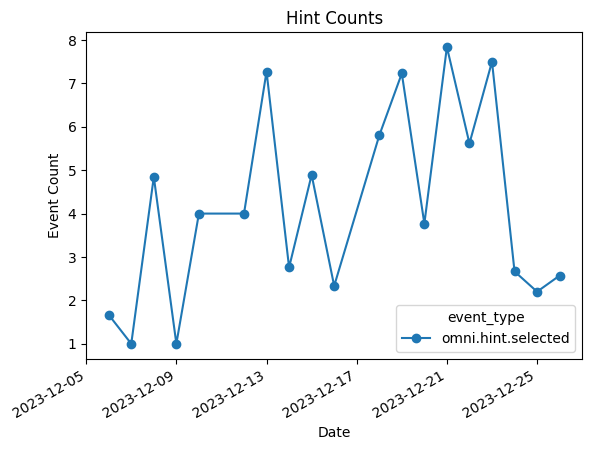

In [21]:
# Voila: converting this cell to a Voila interactive plot
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have the result_df DataFrame from the previous code

# Convert to Pandas DataFrame
result_pandas = result3_df.to_pandas()

# Pivot the DataFrame for better visualization
pivot_df = result_pandas.pivot(index='date', columns='event_type', values='average')

# Plot the data using line plot
plt.figure(figsize=(15, 6))
pivot_df.plot(kind='line', marker='o')
plt.title('Hint Counts')
plt.xlabel('Date')
plt.ylabel('Event Count')

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Average Chips Interactivity</h1>
</div>
"""

# Display the navigation bar
display(HTML(navbar_html))


# Voila: live



In [8]:
# import polars as pl

# filtered_df = df.filter(
#     (df['event_type'].is_in(['omni.utterance.detected', 'omni.text.detected'])) &
#     df['timestamp'].is_not_null()
# )

# filtered_df = filtered_df.with_columns(
#     date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
# )

# result3_df = (
#     filtered_df
#     .groupby(['date', 'event_type'])
#     .agg(event_count=pl.col('timestamp').count())
#     .sort(['date', 'event_type'])
# )



/var/folders/69/fwpfz67x4szfdnkld_9kl1g80000gp/T/ipykernel_13320/1281683838.py:13: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  filtered_df


In [32]:
import polars as pl

filtered_df = df.filter(
    (df['event_type'].is_in(['omni.utterance.detected', 'omni.text.detected'])) &
    df['timestamp'].is_not_null()
)

filtered_df = filtered_df.with_columns(
    date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
)

result4_df = (
    filtered_df
    .group_by(['date', 'event_type'])
    .agg(
        event_count=pl.col('timestamp').count(),
        user_count=pl.col('device_id').n_unique()
    )
    .sort(['date', 'event_type'])
)
result4_df = result4_df.with_columns(
    average=result4_df['event_count'] / result4_df['user_count']
)


In [23]:
import polars as pl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML


result_pandas = result4_df.to_pandas()

pivot_df = result_pandas.pivot(index='date', columns='event_type', values='average')


event_types = result_pandas['event_type'].unique().tolist()

event_type_dropdown = widgets.Dropdown(options=event_types, description='Event Type')


navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Interactivity Type</h1>
</div>
"""


display(HTML(navbar_html))


def plot_bar(event_type):
    plt.figure(figsize=(10, 6))
    pivot_df[event_type].plot(kind='bar', stacked=True)
    plt.title(f'Event Counts for {event_type}')
    plt.xlabel('Date')
    plt.ylabel('Event Count')
    plt.show()


interactive_bar_plot = widgets.interactive(plot_bar, event_type=event_type_dropdown)


display(interactive_bar_plot)


interactive(children=(Dropdown(description='Event Type', options=('omni.text.detected', 'omni.utterance.detect…

In [10]:
#voila:hide-code
column_search_term = df['ui_hints']

new_df = pl.DataFrame({'ui_hints': column_search_term})

/var/folders/69/fwpfz67x4szfdnkld_9kl1g80000gp/T/ipykernel_13320/1051141624.py:5: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  filtered_df = new_df.filter(new_df['ui_hints'].apply(lambda x: not isinstance(x, list)))


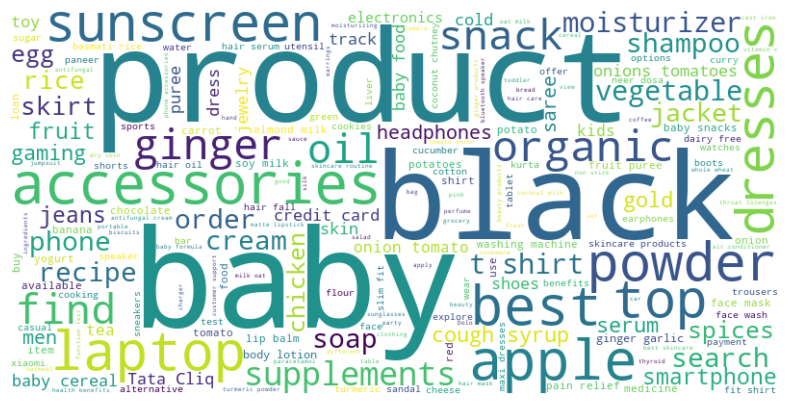

In [11]:
import polars as pl
from wordcloud import WordCloud
import matplotlib.pyplot as plt

filtered_df = new_df.filter(new_df['ui_hints'].apply(lambda x: not isinstance(x, list)))

column_ui_hints = filtered_df['ui_hints'].unique()


ui_hints_list = [str(value) if value is not None else '' for value in column_ui_hints]

text = ' '.join(ui_hints_list)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>WordCloud for UI Hints</h1>
</div>
"""

# Display the navigation bar
display(HTML(navbar_html))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
import json
new1_df = df.with_columns(
    search_term=df['parameters'].map_elements(
        lambda x: json.loads(x).get('search_term', '') if x else ''
    )
).select(['search_term'])


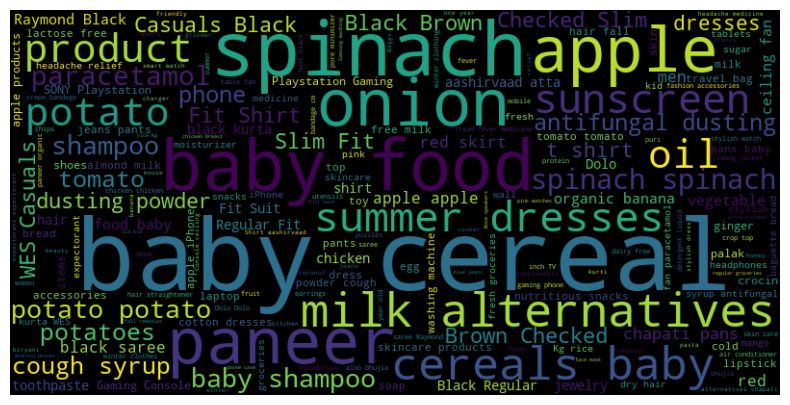

In [13]:
import polars as pl
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt


new1_df_filtered = new1_df.filter(new1_df['search_term'].is_not_null())


search_term_list = new1_df_filtered['search_term'].to_list()
text = ' '.join(str(term) for term in search_term_list)


wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>WordCloud for Search Term</h1>
</div>
"""


display(HTML(navbar_html))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
import polars as pl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML

feedback_scores_df = df.filter(pl.col('feedback_value').is_not_null())

score_column = (
    pl.when(pl.col('feedback_value') == 'positive').then(2)
    .when(pl.col('feedback_value') == 'negative').then(-2)
    .otherwise(1)
)

feedback_scores_df = feedback_scores_df.with_columns(score=score_column)

feedback_scores_df = feedback_scores_df.with_columns(
    date=pl.col("timestamp").str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S%.f %Z")
)


feedback_scores_df = (
    feedback_scores_df
    .groupby(['date', 'event_type'])
    .agg(
        total_queries=pl.col('score').count(),  
        weighted_score_sum=pl.col('score').sum(), 
    )
)

feedback_scores_df = feedback_scores_df.with_columns(
    average_score=feedback_scores_df['weighted_score_sum'] / feedback_scores_df['total_queries']
)

feedback_scores_df = feedback_scores_df.drop(['total_queries', 'weighted_score_sum'])


feedback_scores_pandas = feedback_scores_df.to_pandas()


def plot_average_score(event_type):
    plt.figure(figsize=(10, 6))
    filtered_df = feedback_scores_pandas[feedback_scores_pandas['event_type'] == event_type]
    plt.bar(filtered_df['date'], filtered_df['average_score'])
    plt.title(f'Average Score for {event_type}')
    plt.xlabel('Date')
    plt.ylabel('Average Score')
    plt.show()


event_types = feedback_scores_pandas['event_type'].unique().tolist()


event_type_dropdown = widgets.Dropdown(options=event_types, description='Event Type')


interactive_plot = widgets.interactive(plot_average_score, event_type=event_type_dropdown)

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>FeedBack Scores</h1>
</div>
"""

# Display the navigation bar
display(HTML(navbar_html))

# Display the interactive plot
display(interactive_plot)


/var/folders/69/fwpfz67x4szfdnkld_9kl1g80000gp/T/ipykernel_13320/3090500839.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  feedback_scores_df


interactive(children=(Dropdown(description='Event Type', options=('omni.user.feedback',), value='omni.user.fee…

In [15]:
# #voila:hide-code
# !pip install wordcloud matplotlib

In [45]:
import plotly.offline as pyo
from plotly import graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import polars as pl
import voila

result_df = pl.DataFrame({
    'event_type': ['omni.trigger.shown', 'omni.trigger.click', 'omni.interaction.detected', 'omni.response.complete'],
    'session_count': [2259, 1249, 1349, 1009]
})

pyo.init_notebook_mode(connected=True)

fig = go.Figure(go.Funnel(
    y=result_df['event_type'],
    x=result_df['session_count'],
    textposition="inside",
    textinfo="value+percent previous",
    opacity=0.65,
    marker={
        "color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
        "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]},
    },
    connector={"line": {"color": "royalblue", "dash": "dot", "width": 3}}
))

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Positive Funnel Based On Events</h1>
</div>
"""

display(HTML(navbar_html))
chart_widget = widgets.Output()
with chart_widget:
    display(fig)

display(chart_widget)


# voila.show_notebook()


Output()

In [40]:
#voila:hide-code


# Assuming you have a DataFrame named result_df with 'event_type' and 'session_count' columns
result_df = pl.DataFrame({
    'event_type': ['omni.trigger.shown', 'omni.trigger.click', 'omni.interaction.detected', 'omni.response.complete'],
    'session_count': [2259, 1249, 1349, 1009]
})

pyo.init_notebook_mode(connected=True)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=result_df['event_type'],
    y=result_df['session_count'],
    name='Session Count'
))

fig.update_layout(
    title='Time Series Chart',
    xaxis_title='Event Type',
    yaxis_title='Session Count',
    showlegend=True,
)
navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Positive Funnel</h1>
</div>
"""

display(HTML(navbar_html))

chart_widget = widgets.Output()
with chart_widget:
    display(fig)

# Display the chart widget
display(chart_widget)

# Uncomment the line below when running with Voila
# voila.show_notebook()


Output()

In [41]:

result2_df = pl.DataFrame({
    'event_type': ['omni.trigger.shown', 'omni.trigger.click', 'omni.interaction.detected', 'omni.response.complete'],
    'session_count': [778, 493, 674, 498]
})

pyo.init_notebook_mode(connected=True)

# Create a Funnel chart
fig = go.Figure(go.Funnel(
    y=result2_df['event_type'],
    x=result2_df['session_count'],
    textposition="inside",
    textinfo="value+percent previous",
    opacity=0.65,
    marker={
        "color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
        "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]},
    },
    connector={"line": {"color": "royalblue", "dash": "dot", "width": 3}}
))

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Positive Funnel Based On Users</h1>
</div>
"""

display(HTML(navbar_html))
chart_widget = widgets.Output()
with chart_widget:
    display(fig)

# Display the chart widget
display(chart_widget)

# voila.show_notebook()


Output()

In [42]:


result2_df = pl.DataFrame({
    'event_type': ['omni.trigger.shown', 'omni.user.cancel'],
    'session_count': [2259, 188]
})

pyo.init_notebook_mode(connected=True)

fig = go.Figure(go.Funnel(
    y=result2_df['event_type'],
    x=result2_df['session_count'],
    textposition="inside",
    textinfo="value+percent previous",
    opacity=0.65,
    marker={
        "color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
        "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]},
    },
    connector={"line": {"color": "royalblue", "dash": "dot", "width": 3}}
))

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Negative Funnel Based On Events</h1>
</div>
"""

display(HTML(navbar_html))

chart_widget = widgets.Output()
with chart_widget:
    display(fig)

# Display the chart widget
display(chart_widget)


Output()

In [44]:
import plotly.offline as pyo
from plotly import graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import polars as pl
import voila

result2_df = pl.DataFrame({
    'event_type': ['omni.trigger.shown', 'omni.user.cancel'],
    'session_count': [778, 107]
})

pyo.init_notebook_mode(connected=True)

fig = go.Figure(go.Funnel(
    y=result2_df['event_type'],
    x=result2_df['session_count'],
    textposition="inside",
    textinfo="value+percent previous",
    opacity=0.65,
    marker={
        "color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
        "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]},
    },
    connector={"line": {"color": "royalblue", "dash": "dot", "width": 3}}
))

navbar_html = """
<div style="background-color:powderblue; padding: 5px; text-align: left; width: 500px;">
    <h1>Negative Funnel Based On Users</h1>
</div>
"""

display(HTML(navbar_html))
chart_widget = widgets.Output()
with chart_widget:
    display(fig)

# Display the chart widget
display(chart_widget)


Output()